In [1]:
import numpy as np
import hmc_v2 as hmc
import matplotlib.pyplot as plt
import corner

In [2]:
limits = [(-4,4),(-4,4)]
nparam = len(limits)

In [3]:
def mock_posterior_and_gradient(p):
    logP = -0.5 * np.sum(p**2)
    logP_jacobian = p * (-1)
    return logP, logP_jacobian

In [4]:
def run_hmc(n_it, filebase, epsilon, steps_per_iteration):
    #rank = 5
    rank = nparam
    filename = f'{filebase}.{rank}.txt'
    #np.random.seed(100 + rank)
    C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, C, epsilon, steps_per_iteration, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.sample(n_it, fid_params)

    # continue
    #for i in range(1):
        # Save chain
        #chain = np.array(sampler.trace)
        #np.savetxt(filename, chain)

        # next round of samples
    #sampler.sample(n_it)
    
    chain = np.array(sampler.paths)
    anti_chain = np.array(sampler.anti_paths)
    #np.savetxt(filename, chain)
    return chain, anti_chain

In [10]:
nit = 5
spit = 100
chain, anti_chain = run_hmc(nit, "hmc_002_500", 0.02, spit)

1.2876257045078012
1.2877728059399365
1.2876623528108837
Stopped after 112 steps
Accept 0 alpha=0.90  p=0.57  ΔH=0.104
5.79412547882471
5.794787413541392
5.794290390775366
Stopped after 112 steps
Reject 1 alpha=0.02  p=0.64  Δh=4.028
3.318525393469955
3.318904509727302
3.3186198450827034
Stopped after 112 steps
Reject 2 alpha=0.24  p=0.77  Δh=1.409
2.277060268782853
2.277320405579923
2.2771250782958776
Stopped after 112 steps
Reject 3 alpha=0.35  p=0.76  Δh=1.063
1.6318701393070072
1.6320565680445744
1.6319165854685331
Stopped after 112 steps
Reject 4 alpha=0.33  p=0.50  Δh=1.109


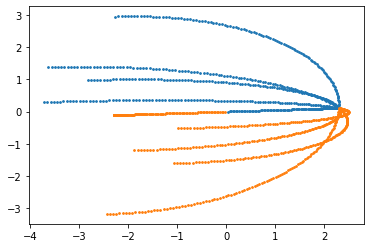

In [8]:
plt.scatter(chain[:,0],chain[:,1],s=3)
plt.scatter(anti_chain[:,0],anti_chain[:,1],s=3)
plt.show()